In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
gj_train = pd.read_parquet('train_ldaps_gyeongju.parquet')
gj_test = pd.read_parquet('test_ldaps_gyeongju.parquet')

train_y = pd.read_csv('1-1. train_y.csv')
gj_train_y = train_y.loc[train_y['plant_name'] == '경주풍력', :]
display(gj_train.head())   
display(gj_test.head())
display(train_y.head())

,dt,elevation,land_cover,surf_rough,frictional_vmax_50m,frictional_vmin_50m,pressure,relative_humid,specific_humid,temp_air,storm_u_5m,storm_v_5m,wind_u_10m,wind_v_10m,turbine_id
0,2020-01-02 00:00:00+09:00,387.640625,1.0,0.286911,10.428498,10.059580,97974.593750,91.796478,0.002686,269.467560,0.021201,-0.375756,7.353266,-2.640615,WTG01
1,2020-01-02 01:00:00+09:00,387.640625,1.0,0.286911,10.472921,10.044404,97970.132812,91.729774,0.002686,269.430847,0.020706,-0.371947,7.578446,-2.414076,WTG01
2,2020-01-02 02:00:00+09:00,387.640625,1.0,0.286911,10.682985,10.478634,97951.546875,92.788666,0.002686,269.374390,0.020556,-0.354397,7.654554,-2.259913,WTG01
3,2020-01-02 03:00:00+09:00,387.640625,1.0,0.286911,10.676681,10.090029,97908.968750,92.494576,0.002686,269.352112,0.021635,-0.328609,7.275844,-2.280371,WTG01
4,2020-01-02 04:00:00+09:00,387.640625,1.0,0.286911,10.079557,9.672620,97858.398438,88.986443,0.002686,269.413269,0.024231,-0.265124,6.911751,-1.920128,WTG01


,dt,elevation,land_cover,surf_rough,frictional_vmax_50m,frictional_vmin_50m,pressure,relative_humid,specific_humid,temp_air,storm_u_5m,storm_v_5m,wind_u_10m,wind_v_10m,turbine_id
0,2023-01-01 00:00:00+09:00,387.640625,1.0,0.286911,11.116076,10.788924,97858.437500,74.741974,0.002441,269.822052,0.053748,-0.066199,7.711938,-1.282177,WTG01
1,2023-01-01 01:00:00+09:00,387.640625,1.0,0.286911,10.945148,10.699340,97847.906250,73.057632,0.002263,269.790710,0.064034,-0.212118,7.628698,-1.509970,WTG01
2,2023-01-01 02:00:00+09:00,387.640625,1.0,0.286911,11.457981,10.870457,97863.867188,71.513168,0.002197,269.840515,0.071656,-0.213301,8.034372,-1.425219,WTG01
3,2023-01-01 03:00:00+09:00,387.640625,1.0,0.286911,11.583426,11.074321,97853.390625,73.938629,0.002230,269.616333,0.069788,-0.153121,7.834104,-0.680731,WTG01
4,2023-01-01 04:00:00+09:00,387.640625,1.0,0.286911,11.028671,10.432499,97808.242188,75.667435,0.002240,269.364868,0.068385,-0.084777,7.439806,-0.103689,WTG01


,plant_name,end_datetime,period_hours,energy_kwh
0,경주풍력,2020-01-01T01:00:00+09:00,1,9767.578125
1,경주풍력,2020-01-01T02:00:00+09:00,1,5381.835938
2,경주풍력,2020-01-01T03:00:00+09:00,1,3021.484375
3,경주풍력,2020-01-01T04:00:00+09:00,1,4400.390625
4,경주풍력,2020-01-01T05:00:00+09:00,1,4501.953125


In [12]:
print(gj_train.shape)    # 235,818개 행, 15개 열  --> train_data에 turbine_id가 WGT01-09까지 합쳐져있음
print(gj_test.shape)     # 78,840개 행, 15개 열
print(gj_train_y.shape)  # 26,304개 행, 4개 열    
                         # train_x와 train_y의 행 개수가 맞지 않음!
                         # 좀 더 탐색 필요할듯듯
                         # 24 * 365 * 3 = 26280 --> 한 시간 단위로 3년이면 26280개 행이 있어야 하는거 아닌감..

(235818, 15)
(78840, 15)
(26304, 4)


In [72]:
gj_train01 = gj_train.loc[gj_train['turbine_id'] == 'WTG01']
gj_train01.shape   # 26202개 행, 15개 열 --> 그래도 test_y와 행 개수 맞지 않음.
display(gj_train01.head(10))

,dt,elevation,land_cover,surf_rough,frictional_vmax_50m,frictional_vmin_50m,pressure,relative_humid,specific_humid,temp_air,storm_u_5m,storm_v_5m,wind_u_10m,wind_v_10m,turbine_id
0,2020-01-02 00:00:00+09:00,387.640625,1.0,0.286911,10.428498,10.059580,97974.593750,91.796478,0.002686,269.467560,0.021201,-0.375756,7.353266,-2.640615,WTG01
1,2020-01-02 01:00:00+09:00,387.640625,1.0,0.286911,10.472921,10.044404,97970.132812,91.729774,0.002686,269.430847,0.020706,-0.371947,7.578446,-2.414076,WTG01
2,2020-01-02 02:00:00+09:00,387.640625,1.0,0.286911,10.682985,10.478634,97951.546875,92.788666,0.002686,269.374390,0.020556,-0.354397,7.654554,-2.259913,WTG01
3,2020-01-02 03:00:00+09:00,387.640625,1.0,0.286911,10.676681,10.090029,97908.968750,92.494576,0.002686,269.352112,0.021635,-0.328609,7.275844,-2.280371,WTG01
4,2020-01-02 04:00:00+09:00,387.640625,1.0,0.286911,10.079557,9.672620,97858.398438,88.986443,0.002686,269.413269,0.024231,-0.265124,6.911751,-1.920128,WTG01
5,2020-01-02 05:00:00+09:00,387.640625,1.0,0.286911,10.172257,9.720346,97827.554688,86.816383,0.002686,269.531189,0.025048,-0.284825,7.253250,-2.388391,WTG01
6,2020-01-02 06:00:00+09:00,387.640625,1.0,0.286911,10.916547,10.211677,97829.273438,87.227058,0.002686,269.684204,0.029298,-0.358250,7.790693,-2.815061,WTG01
7,2020-01-02 07:00:00+09:00,387.640625,1.0,0.286911,11.196836,10.919600,97872.109375,87.197525,0.002686,269.807678,0.020383,-0.433627,8.031821,-3.002549,WTG01
8,2020-01-02 08:00:00+09:00,387.640625,1.0,0.286911,11.195824,11.106686,97937.992188,86.390419,0.002686,270.375610,0.020331,-0.470265,8.045771,-2.946987,WTG01
9,2020-01-02 09:00:00+09:00,387.640625,1.0,0.286911,11.209018,11.034824,97999.296875,81.923981,0.002905,272.340088,0.014937,-0.454444,8.114513,-2.739871,WTG01


In [52]:
# 날짜 개수도 안맞음!

print(gj_train['dt'].nunique())
print(gj_train_y['end_datetime'].nunique())

26202
26304


In [102]:
print(gj_train_y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26304 entries, 0 to 26303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   plant_name    26304 non-null  object 
 1   end_datetime  26304 non-null  object 
 2   period_hours  26304 non-null  int64  
 3   energy_kwh    26304 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ MB
None


In [101]:
print(gj_train01.info())


<class 'pandas.core.frame.DataFrame'>
Index: 26202 entries, 0 to 235625
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype                     
---  ------               --------------  -----                     
 0   dt                   26202 non-null  datetime64[ns, Asia/Seoul]
 1   elevation            26202 non-null  float32                   
 2   land_cover           26202 non-null  float32                   
 3   surf_rough           26202 non-null  float32                   
 4   frictional_vmax_50m  26202 non-null  float32                   
 5   frictional_vmin_50m  26202 non-null  float32                   
 6   pressure             26202 non-null  float32                   
 7   relative_humid       26202 non-null  float32                   
 8   specific_humid       26202 non-null  float32                   
 9   temp_air             26202 non-null  float32                   
 10  storm_u_5m           26202 non-null  float32                  

In [61]:
# 결측치는 없음음
gj_train01.isnull().sum()

dt                     0
elevation              0
land_cover             0
surf_rough             0
frictional_vmax_50m    0
frictional_vmin_50m    0
pressure               0
relative_humid         0
specific_humid         0
temp_air               0
storm_u_5m             0
storm_v_5m             0
wind_u_10m             0
wind_v_10m             0
turbine_id             0
dtype: int64

In [73]:
# 각 변수의 unique값 개수 확인
# elevation, land_cover, surf_rough는 하나의 터빈(turbine_id)에 대해 하나의 값만을 가짐.

gj_train01.nunique()

dt                     26202
elevation                  1
land_cover                 1
surf_rough                 1
frictional_vmax_50m    26190
frictional_vmin_50m    26183
pressure               25098
relative_humid         26152
specific_humid         18430
temp_air               25900
storm_u_5m             25954
storm_v_5m             26167
wind_u_10m             26182
wind_v_10m             26179
turbine_id                 1
dtype: int64

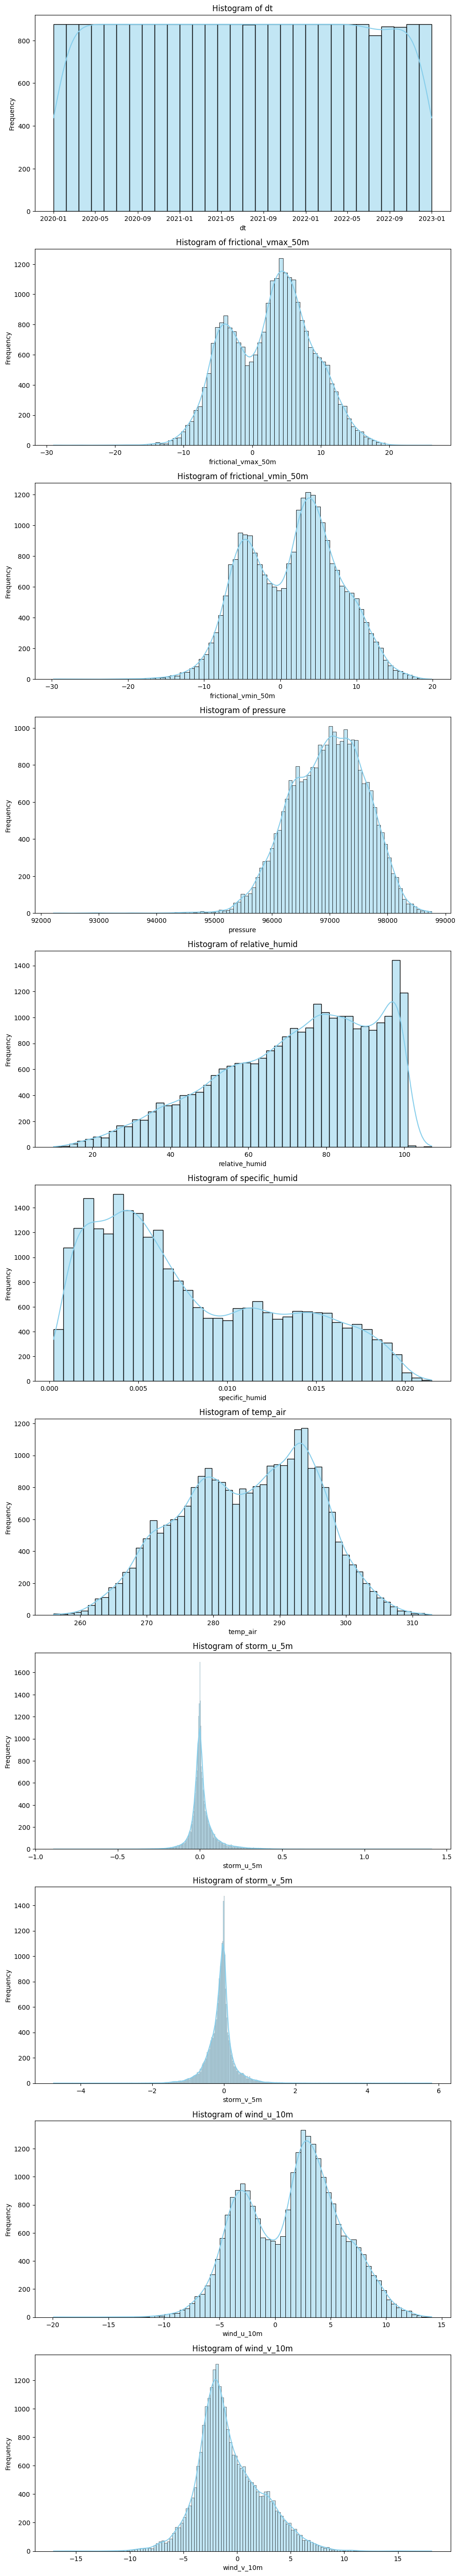

In [81]:
select_col = gj_train01.loc[:, gj_train01.nunique() != 1].columns

plt.figure(figsize=(10, 5 * len(num_col)))

for i, column in enumerate(select_col, 1):
    plt.subplot(len(num_col), 1, i)
    sns.histplot(gj_train01[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()